In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from tensorflow.keras.models import load_model
import joblib

In [4]:
df = pd.read_csv("/content/dummy_status_gizi_bumil_new.csv")
df.head()

,no,nama,umur,bb_dulu,bb_sekarang,tinggi_badan,tekanan,lila,hb,IMT,status_gizi
0,1,Paramita Ardianto,18,61.7,69.6,152,104/62,22.0,12,26.7,Gizi Kurang
1,2,Fitriani Laksita,42,52.5,60.1,168,117/75,31.5,12,18.6,Gizi Normal
2,3,Raisa Pudjiastuti,31,54.7,63.5,164,93/63,29.3,12,20.3,Gizi Normal
3,4,Genta Jailani,22,51.5,59.7,160,106/64,32.3,12,20.1,Gizi Normal
4,5,Widya Kusmawati,25,52.3,59.5,164,98/75,29.0,12,19.4,Gizi Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no            1000 non-null   int64  
 1   nama          1000 non-null   object 
 2   umur          1000 non-null   int64  
 3   bb_dulu       1000 non-null   float64
 4   bb_sekarang   1000 non-null   float64
 5   tinggi_badan  1000 non-null   int64  
 6   tekanan       1000 non-null   object 
 7   lila          1000 non-null   float64
 8   hb            1000 non-null   int64  
 9   IMT           1000 non-null   float64
 10  status_gizi   1000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 86.1+ KB


In [6]:
df.nunique()

,0
no,1000
nama,976
umur,27
bb_dulu,226
bb_sekarang,221
tinggi_badan,25
tekanan,512
lila,151
hb,1
IMT,143


In [7]:
df.describe()

,no,umur,bb_dulu,bb_sekarang,tinggi_badan,lila,hb,IMT
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000
mean,500.500000,30.45800,53.093500,60.206300,157.09000,27.208100,12.0,21.658100
std,288.819436,7.71724,5.249257,4.955691,7.26572,4.305115,0.0,2.996894
min,1.000000,18.00000,40.000000,45.300000,145.00000,20.000000,12.0,14.200000
25%,250.750000,24.00000,49.400000,56.700000,151.00000,23.300000,12.0,19.500000
50%,500.500000,30.00000,53.000000,60.000000,157.00000,27.300000,12.0,21.400000
75%,750.250000,37.00000,56.700000,63.700000,163.00000,30.800000,12.0,23.600000
max,1000.000000,44.00000,67.500000,75.300000,169.00000,35.000000,12.0,31.200000


## Data Preparation

In [8]:
df_drop = df.drop(['no', 'umur', 'nama'], axis=1)
df_drop.head()

,bb_dulu,bb_sekarang,tinggi_badan,tekanan,lila,hb,IMT,status_gizi
0,61.7,69.6,152,104/62,22.0,12,26.7,Gizi Kurang
1,52.5,60.1,168,117/75,31.5,12,18.6,Gizi Normal
2,54.7,63.5,164,93/63,29.3,12,20.3,Gizi Normal
3,51.5,59.7,160,106/64,32.3,12,20.1,Gizi Normal
4,52.3,59.5,164,98/75,29.0,12,19.4,Gizi Normal


In [9]:
df_drop[['sistolik', 'diastolik']] = df_drop['tekanan'].str.split('/', expand=True).astype(int)
df_drop.drop(columns=['tekanan'], inplace=True)
df_drop.head()


,bb_dulu,bb_sekarang,tinggi_badan,lila,hb,IMT,status_gizi,sistolik,diastolik
0,61.7,69.6,152,22.0,12,26.7,Gizi Kurang,104,62
1,52.5,60.1,168,31.5,12,18.6,Gizi Normal,117,75
2,54.7,63.5,164,29.3,12,20.3,Gizi Normal,93,63
3,51.5,59.7,160,32.3,12,20.1,Gizi Normal,106,64
4,52.3,59.5,164,29.0,12,19.4,Gizi Normal,98,75


In [10]:
df_drop.dtypes

,0
bb_dulu,float64
bb_sekarang,float64
tinggi_badan,int64
lila,float64
hb,int64
IMT,float64
status_gizi,object
sistolik,int64
diastolik,int64


In [11]:
label_encoder = LabelEncoder()
df_drop['status_gizi_encoded'] = label_encoder.fit_transform(df_drop['status_gizi'])


# Fitur numerik
features = ['bb_dulu', 'bb_sekarang', 'tinggi_badan', 'lila', 'hb', 'IMT', 'sistolik', 'diastolik']
X = df_drop[features]
y = df_drop['status_gizi_encoded']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split: train 70%, val 15%, test 15%
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print("Jumlah data train:", len(X_train))
print("Jumlah data validation:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data train: 699
Jumlah data validation: 151
Jumlah data test: 150


## modeling TensorFlow

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788 (10.89 KB)

 Trainable params: 2,788 (10.89 KB)

 Non-trainable params: 0 (0.00 B)

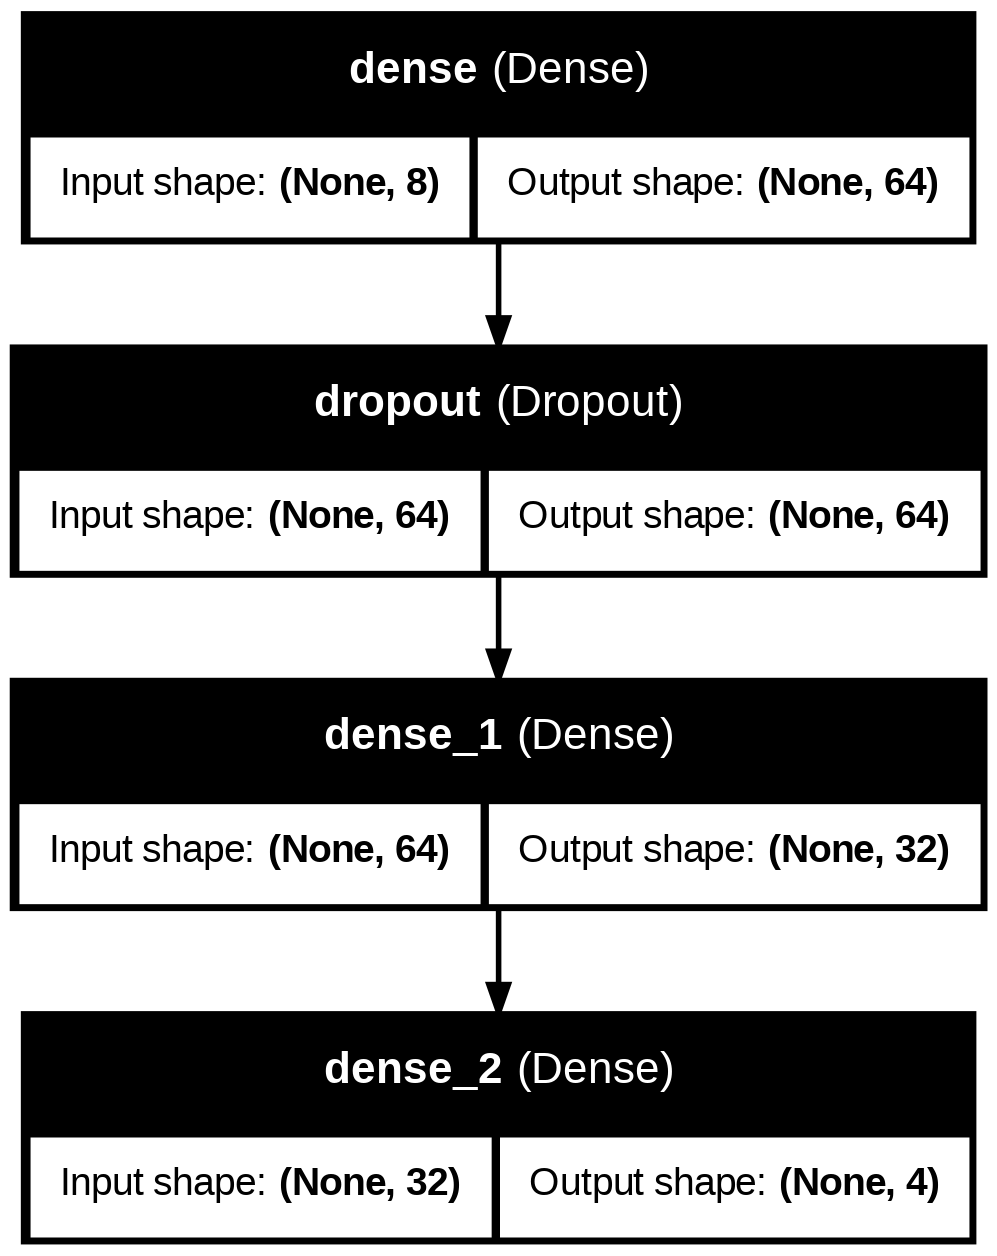

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4681 - loss: 1.2532 - val_accuracy: 0.7086 - val_loss: 0.8980
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7288 - loss: 0.8173 - val_accuracy: 0.7020 - val_loss: 0.7040
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.6681 - val_accuracy: 0.7616 - val_loss: 0.6249
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.5429 - val_accuracy: 0.7682 - val_loss: 0.5478
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.5169 - val_accuracy: 0.7815 - val_loss: 0.4969
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.4080 - val_accuracy: 0.8079 - val_loss: 0.4447
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8140 - loss: 0.4547 - val_accuracy: 0.7947 - val_loss: 0.4127
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8588 - loss: 0.3884 - val_accuracy: 0.8146 - val_los

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi di data test: {test_accuracy:.2f}")


Akurasi di data test: 0.99


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


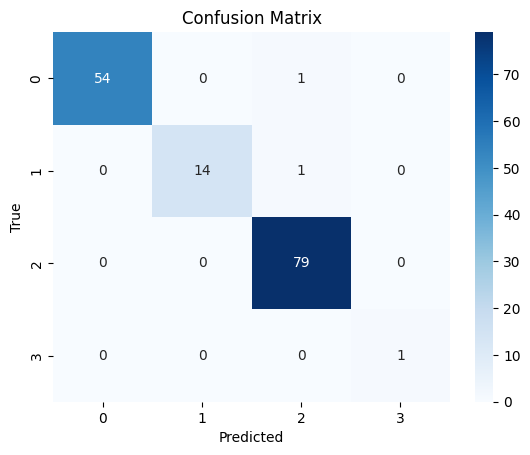

              precision    recall  f1-score   support

 Gizi Kurang       1.00      0.98      0.99        55
  Gizi Lebih       1.00      0.93      0.97        15
 Gizi Normal       0.98      1.00      0.99        79
    Obesitas       1.00      1.00      1.00         1

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


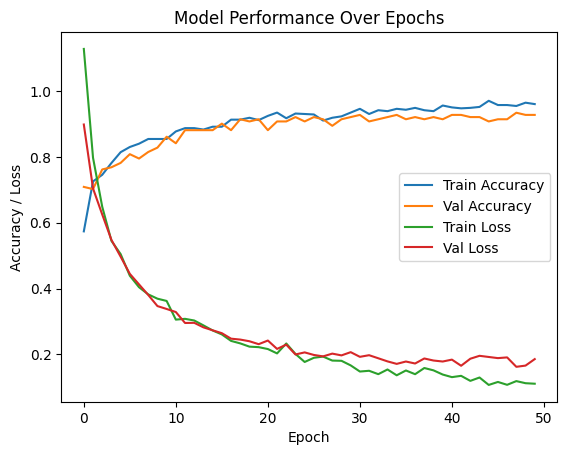

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Model Performance Over Epochs')
plt.show()


SAVED MODEL

In [ ]:
# Simpan model dalam format HDF5
model.save('model_status_gizi.h5')

# Atau format baru .keras (SavedModel)
model.save('model_status_gizi.keras')

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras model_status_gizi.h5 tfjs_model_status_gizi

2025-06-10 09:44:05.186210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749548645.213458    5861 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749548645.221430    5861 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
F!mkdir -p "/content/drive/MyDrive/CAPSTONE PROJECT/Collab Model /TENSORFLOW KLASIFIKASI STATUS GIZI IBU HAMIL /tfjs_models/"
!cp -r tfjs_model_status_gizi "/content/drive/MyDrive/CAPSTONE PROJECT/Collab Model /TENSORFLOW KLASIFIKASI STATUS GIZI IBU HAMIL /tfjs_models/"
